In [3]:
import pandas as pd


def loadData():
    def toNumber(line):
        l = [float(x.strip()) for x in line]
        l[-1] = int(l[-1])
        return l
    with open('data/square.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        square = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/long.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        longData = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/2d-10c.dat', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()[3:]]
        td10c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/smile.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        smile = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/order2-3clust.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        o23c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/iris.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()[:-1]]
        iris = pd.DataFrame(data, columns = ['x', 'y', 'w', 'z', 'label'])
    return square, longData, td10c, smile, o23c, iris

square, longData, td10c, smile, o23c, iris = loadData()
datasets = [(square, 'Square'), (longData, 'Long'), (td10c, '2d-10c'), (smile, 'Smile'), (o23c, 'Order2-3clust'), (iris, 'Iris')]

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


def plotData(data):
    plt.scatter(data.x, data.y, c = data.label, cmap='rainbow')
    plt.show()

def plotDataWithError(data, classified):
    ari = adjusted_rand_score(data.label, classified)
    print("Error %.4lf\tARI: %.4lf:" % ((1 - ari) / 2, ari))
    plt.scatter(data.x, data.y, c = classified, cmap='rainbow')
    plt.show()

Real Clusters
Square


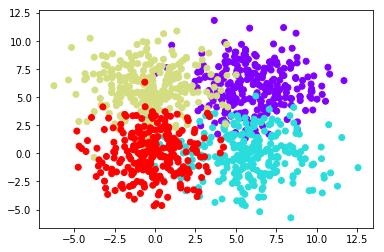

Long


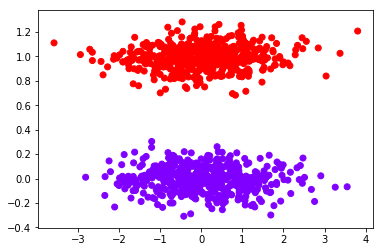

2d-10c


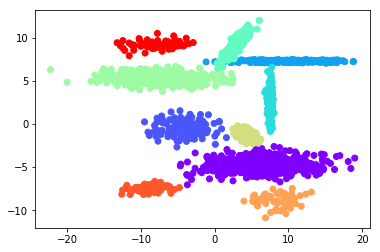

Smile


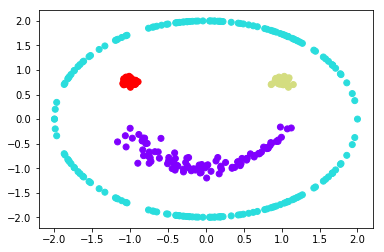

Order2-3clust


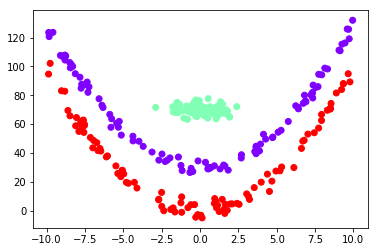

Iris


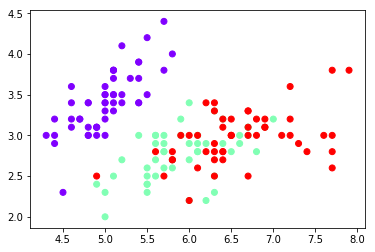

In [35]:
print('Real Clusters')
for data in datasets:
    print(data[1])
    plotData(data[0])

In [12]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def singleLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label))+6, affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def completeLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def averageLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def wardLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)

def DBScan(data):
    cluster = DBSCAN(eps=1.5, min_samples=4).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def kMeans(data):
    cluster = KMeans(n_clusters=len(set(data.label))).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def EMClust(data):
    EMLabels = GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, EMLabels)

Single Link
Square
Error 0.5000	ARI: 0.0000:


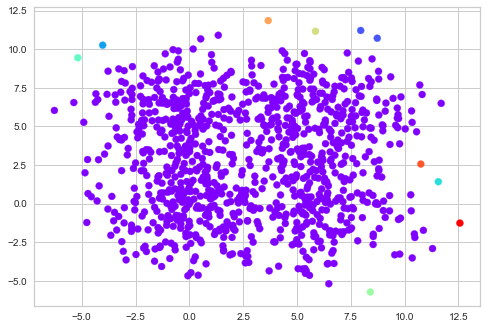

Long
Error 0.0070	ARI: 0.9861:


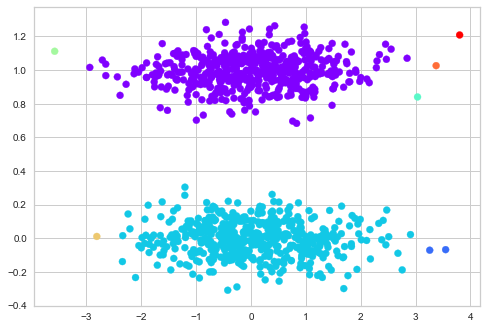

2d-10c
Error 0.3165	ARI: 0.3671:


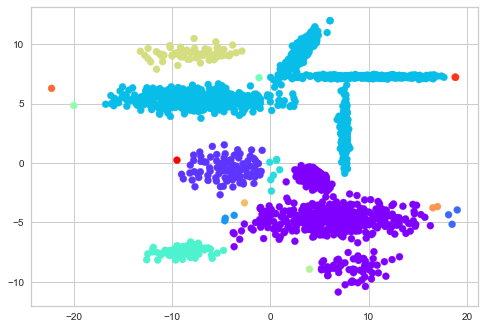

Smile
Error 0.2239	ARI: 0.5522:


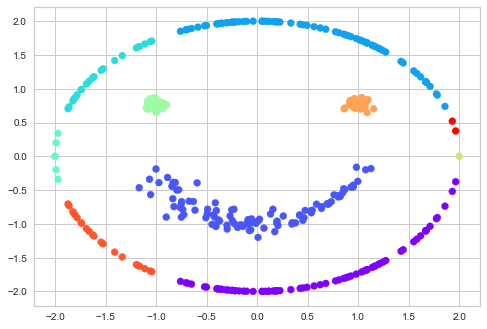

Order2-3clust
Error 0.4835	ARI: 0.0330:


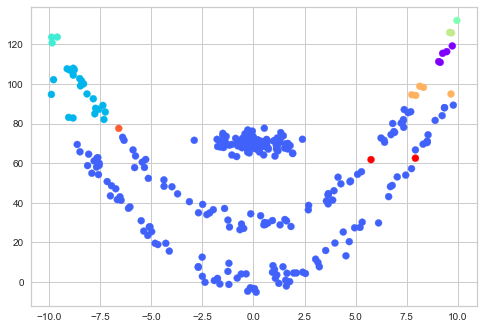

Iris
Error 0.2325	ARI: 0.5349:


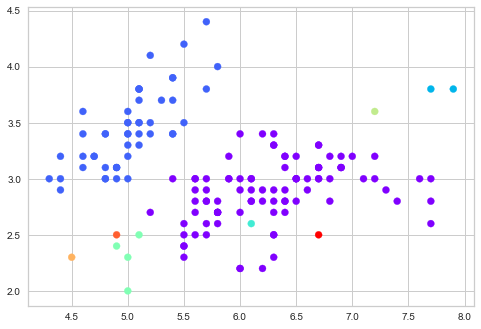

In [13]:
print('Single Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Complete Link
Square
Error 0.2248	ARI: 0.5505:


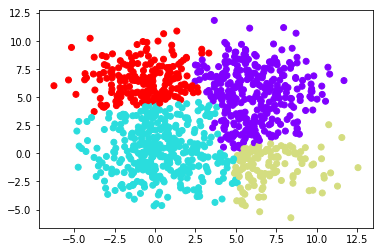

Long
Error 0.4955	ARI: 0.0091:


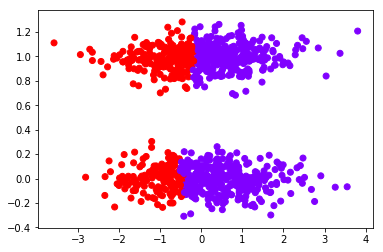

2d-10c
Error 0.2411	ARI: 0.5179:


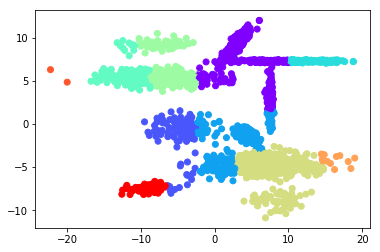

Smile
Error 0.4047	ARI: 0.1906:


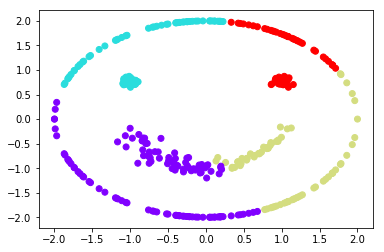

Order2-3clust
Error 0.3538	ARI: 0.2925:


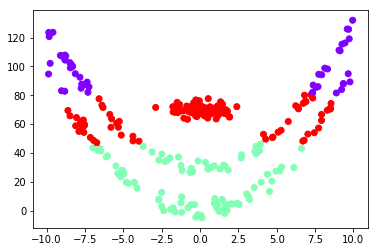

Iris
Error 0.1789	ARI: 0.6423:


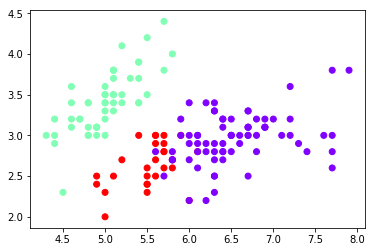

In [38]:
print('Complete Link')
for data in datasets:
    print(data[1])
    completeLink(data[0])

Average Link
Square
Error 0.1981	ARI: 0.6037:


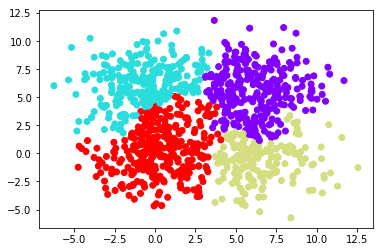

Long
Error 0.5000	ARI: 0.0000:


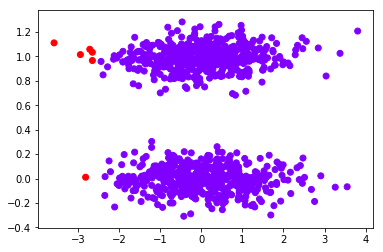

2d-10c
Error 0.1691	ARI: 0.6619:


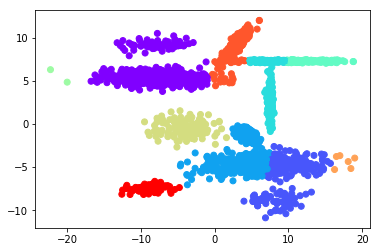

Smile
Error 0.3926	ARI: 0.2148:


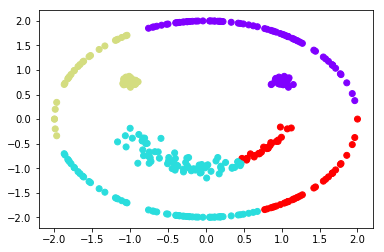

Order2-3clust
Error 0.4105	ARI: 0.1790:


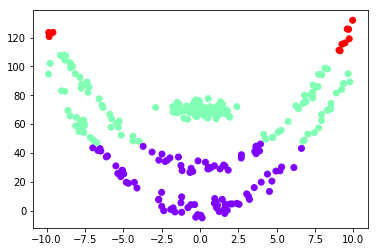

Iris
Error 0.1204	ARI: 0.7592:


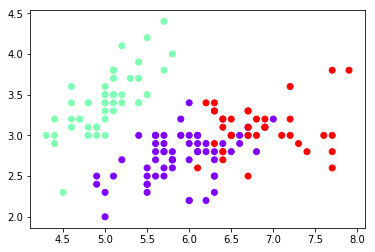

In [39]:
print('Average Link')
for data in datasets:
    print(data[1])
    averageLink(data[0])

Ward Link
Square
Error 0.2384	ARI: 0.5232:


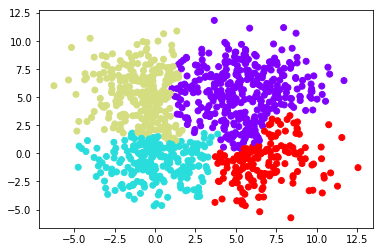

Long
Error 0.4999	ARI: 0.0002:


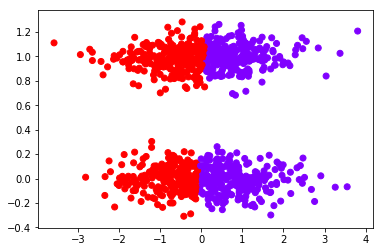

2d-10c
Error 0.1694	ARI: 0.6612:


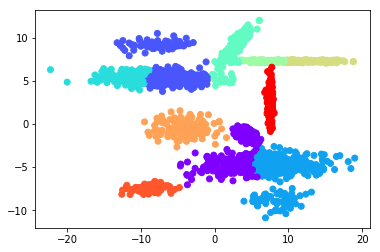

Smile
Error 0.3979	ARI: 0.2041:


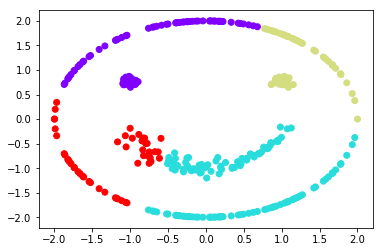

Order2-3clust
Error 0.3436	ARI: 0.3128:


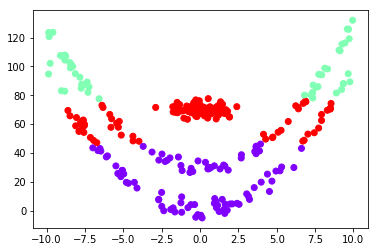

Iris
Error 0.1344	ARI: 0.7312:


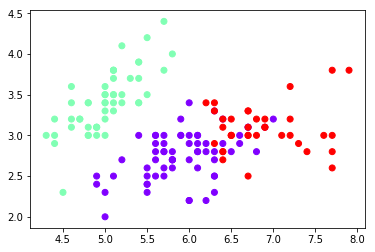

In [40]:
print('Ward Link')
for data in datasets:
    print(data[1])
    wardLink(data[0])

DBSCAN
Square
Error 0.5000	ARI: 0.0000:


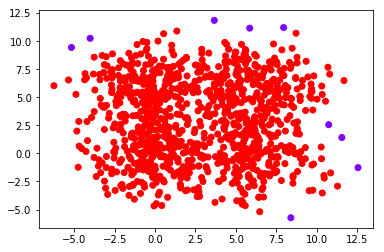

Long
Error 0.5000	ARI: 0.0000:


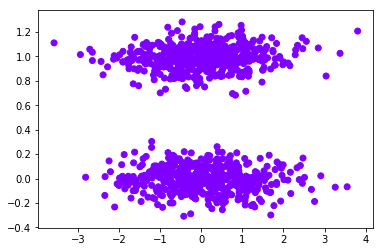

2d-10c
Error 0.3473	ARI: 0.3053:


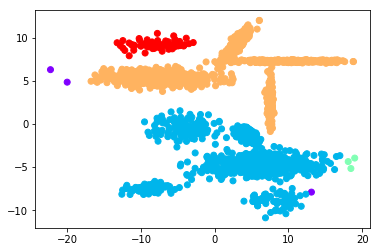

Smile
Error 0.5000	ARI: 0.0000:


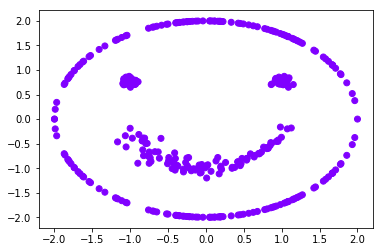

Order2-3clust
Error 0.2646	ARI: 0.4707:


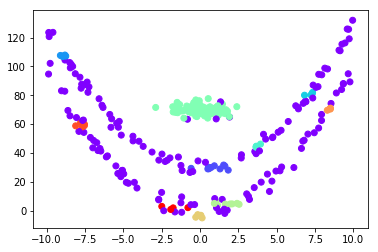

Iris
Error 0.2159	ARI: 0.5681:


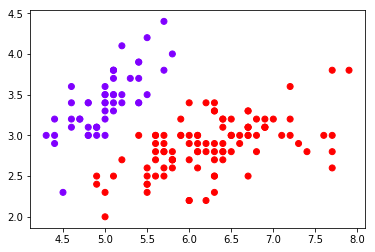

In [9]:
print('DBSCAN')
for data in datasets:
    print(data[1])
    DBScan(data[0])

K-Means
Square
Error 0.1534	ARI: 0.6932:


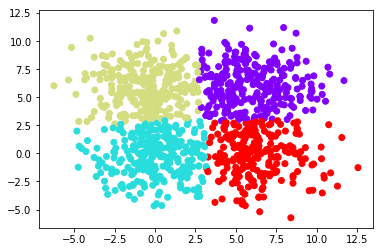

Long
Error 0.5004	ARI: -0.0008:


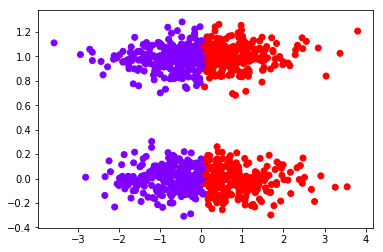

2d-10c
Error 0.1377	ARI: 0.7245:


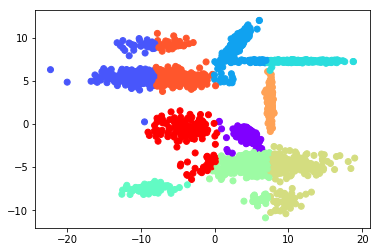

Smile
Error 0.4074	ARI: 0.1852:


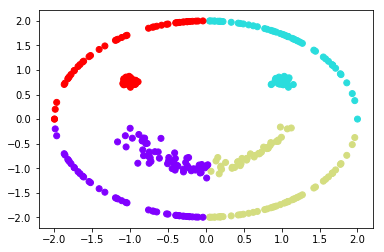

Order2-3clust
Error 0.3789	ARI: 0.2422:


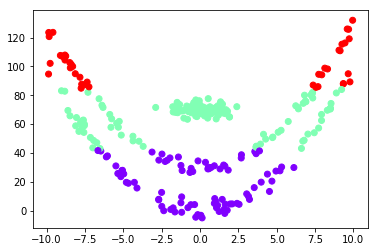

Iris
Error 0.1349	ARI: 0.7302:


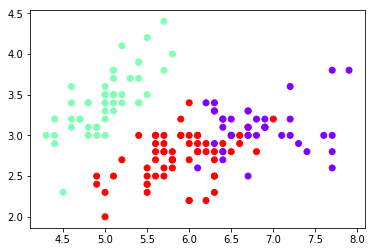

In [42]:
print('K-Means')
for data in datasets:
    print(data[1])
    kMeans(data[0])

EM Algorithm
Square
Error 0.1589	ARI: 0.6822:


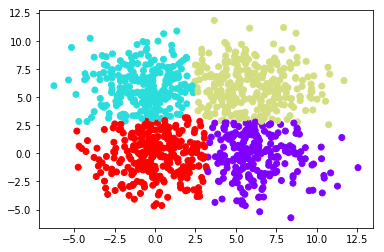

Long
Error 0.4923	ARI: 0.0154:


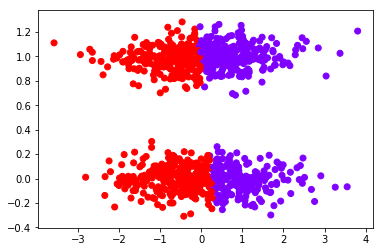

2d-10c
Error 0.0009	ARI: 0.9982:


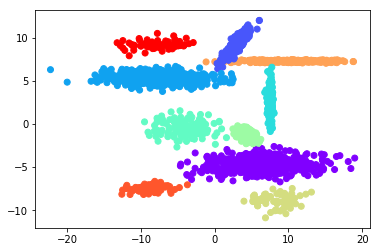

Smile
Error 0.4035	ARI: 0.1929:


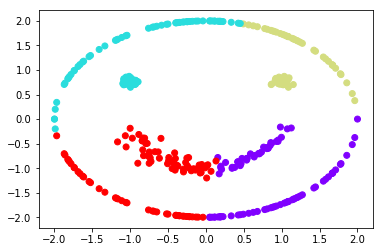

Order2-3clust
Error 0.3096	ARI: 0.3809:


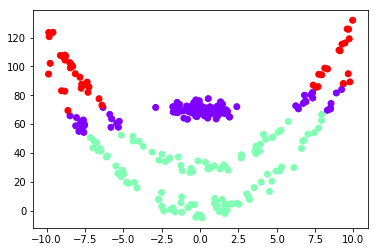

Iris
Error 0.0481	ARI: 0.9039:


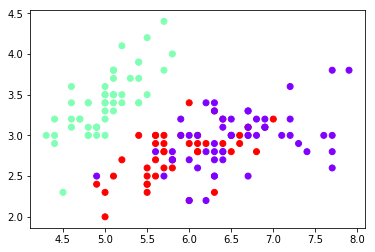

In [43]:
print('EM Algorithm')
for data in datasets:
    print(data[1])
    EMClust(data[0])

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Square	Error 0.3125	ARI: 0.3749:


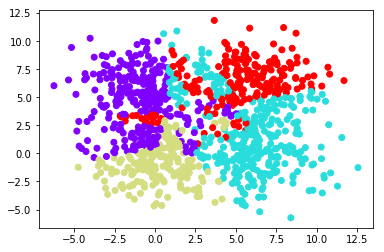

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Long	Error 0.4853	ARI: 0.0293:


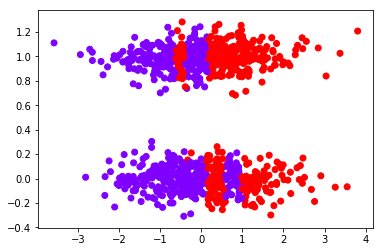

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
2d-10c	Error 0.2272	ARI: 0.5456:


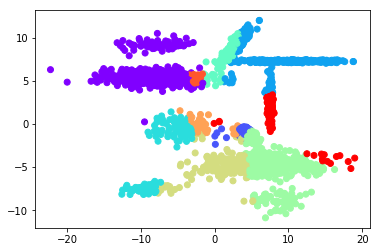

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Smile	Error 0.4095	ARI: 0.1809:


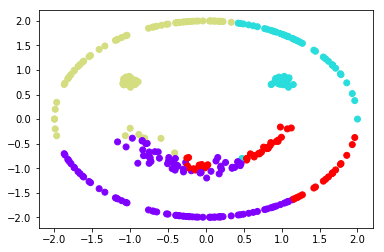

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Order2-3clust	Error 0.3555	ARI: 0.2889:


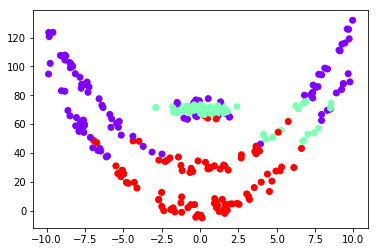

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Iris	Error 0.2180	ARI: 0.5639:


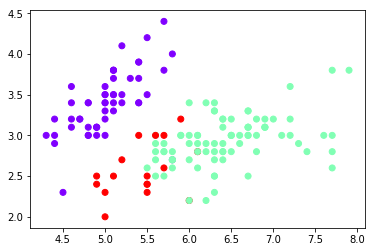

In [41]:
import SimpSOM as sps
import numpy as np


def SOM_clustering(data, grid_shape=(6, 6), lr=0.03, epochs=200):
    data = data.values
    perm = np.random.permutation(len(data))
    raw_data = data[perm, :-1]
    
    net = sps.somNet(*grid_shape, raw_data)
    net.train(lr, epochs)
    total_clusters = len(np.unique(data[:, -1]))
    clusters = net.cluster(
        data[:, :-1], type='KMeans', 
        numcl=total_clusters, show=False, 
        savefile=False, printout=False
    )
    
    labels = np.zeros(len(data))
    for cidx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cidx
    return labels
            

for data, dataset_name in datasets:
    labels = SOM_clustering(data)
    
    print(dataset_name, end="\t")
    plotDataWithError(data, labels)

2d-10c
Elbow for K-means


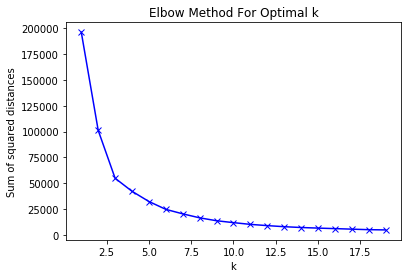

In [45]:
ddd = datasets[2][0]
print(datasets[2][1])
print("Elbow for K-means")
sqDistSum = list()
for k in range(1, 20):
    cluster = KMeans(n_clusters=k).fit(ddd[list(ddd)[:-1]])
    sqDistSum.append(cluster.inertia_)
plt.plot(range(1, 20), sqDistSum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

2d-10c
average linkage


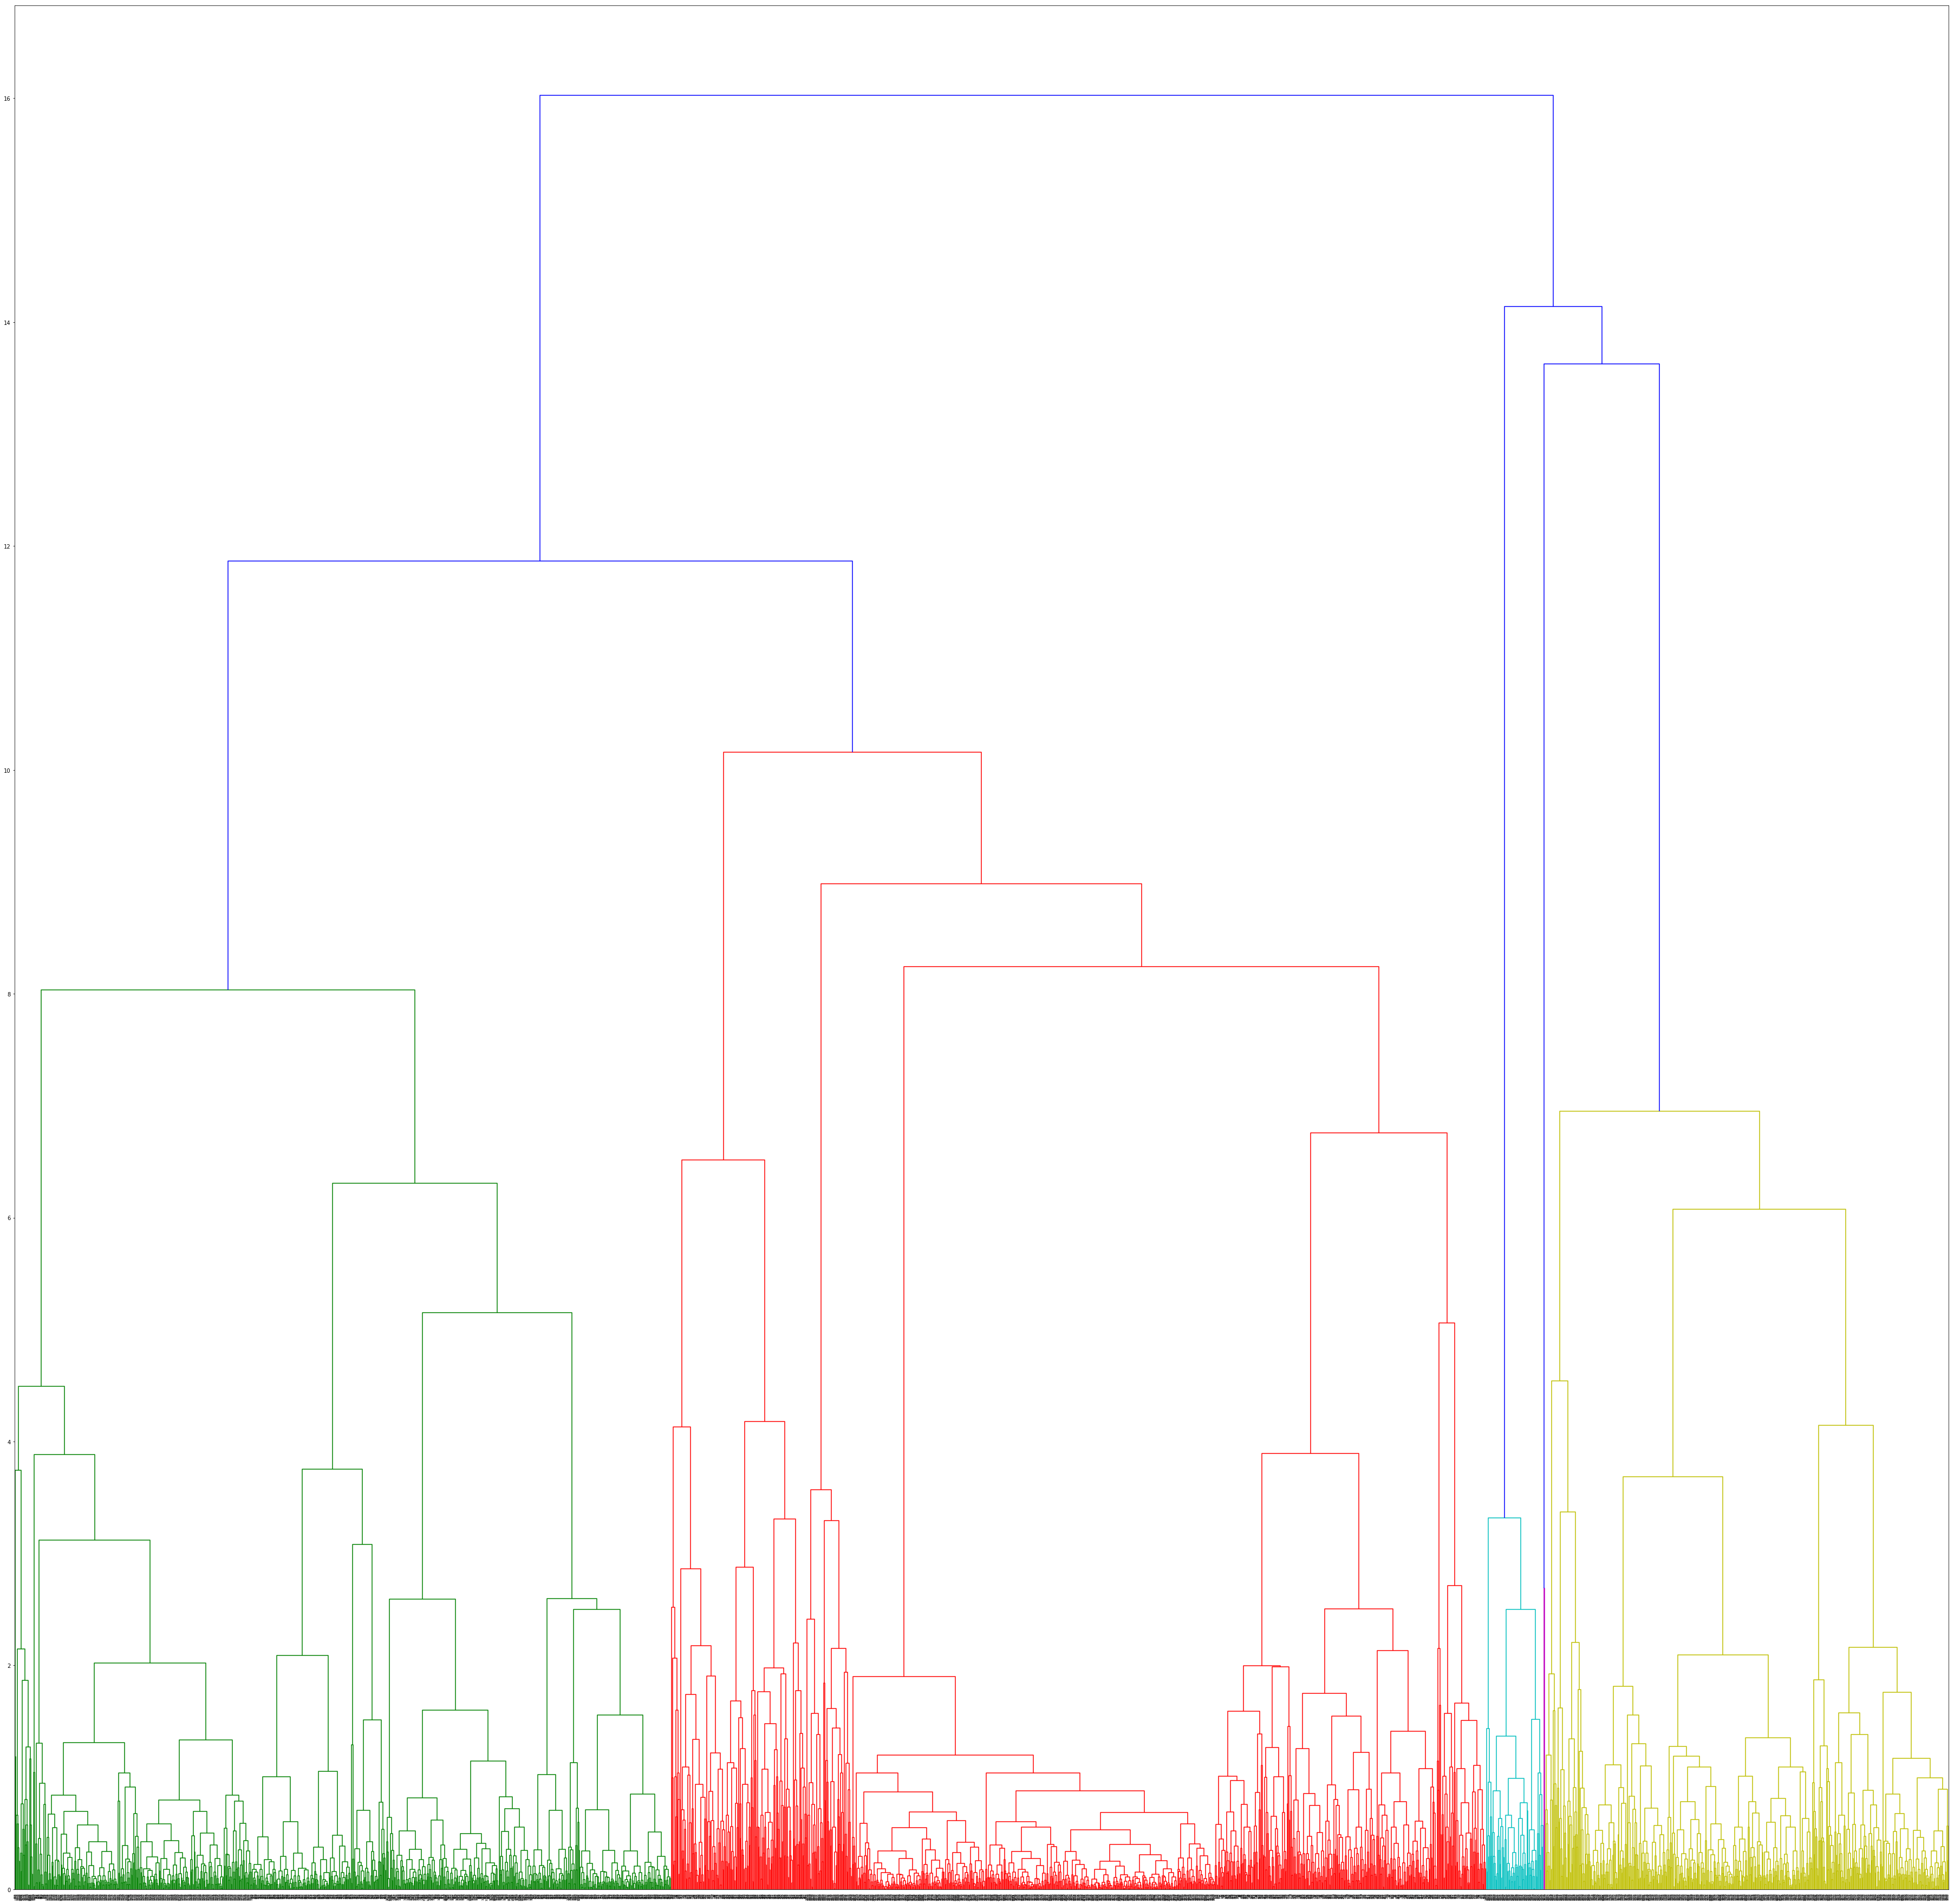

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

ddd = datasets[2][0]
print(datasets[2][1])
print("average linkage")

linked = linkage(ddd, 'average')
labelList = range(1, ddd.label.values.size + 1)
plt.figure(figsize=(2 ** 6, 2 ** 6))  
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=False)
plt.show()  

2d-10c
single linkage


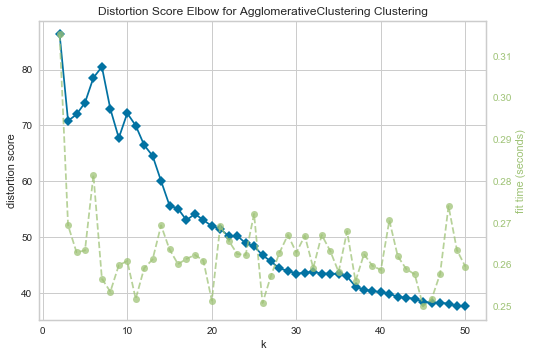

In [14]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

ddd = datasets[2][0]
print(datasets[2][1])
print("single linkage")
model = AgglomerativeClustering(affinity='euclidean', linkage='average')
visualizer = KElbowVisualizer(model, k=50)
visualizer.fit(ddd)
visualizer.poof()  

2d-10c
k-means sillhouete Width
FOR 5 CLUSTERS SUM IS 1253.4310 AND MEAN IS 0.4964


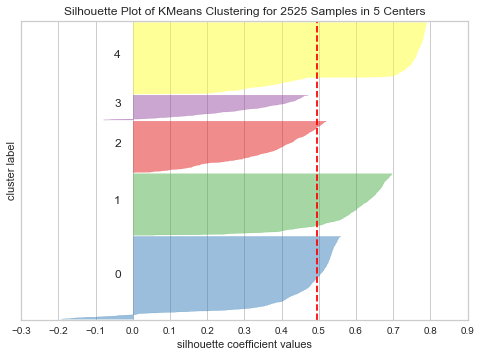

FOR 6 CLUSTERS SUM IS 1313.8271 AND MEAN IS 0.5203


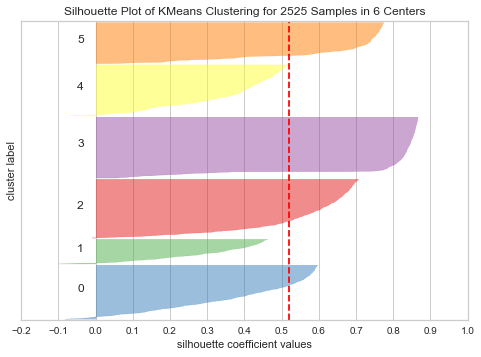

FOR 7 CLUSTERS SUM IS 1387.5273 AND MEAN IS 0.5495


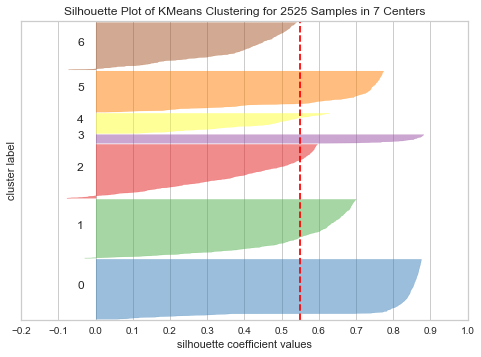

FOR 8 CLUSTERS SUM IS 1343.5236 AND MEAN IS 0.5321


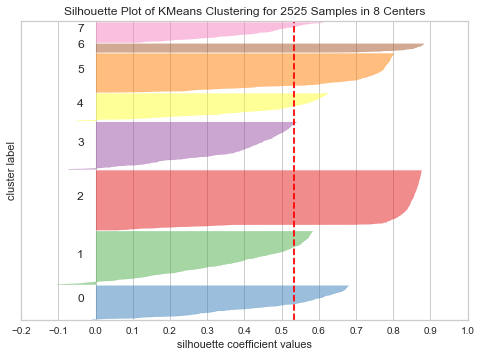

FOR 9 CLUSTERS SUM IS 1438.5345 AND MEAN IS 0.5697


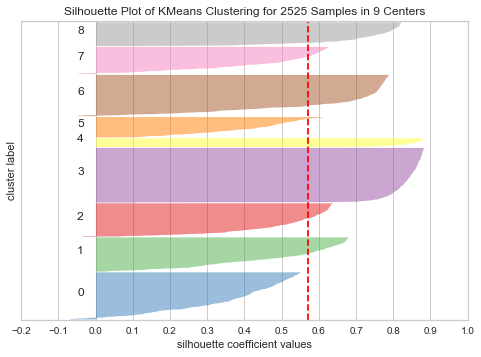

FOR 10 CLUSTERS SUM IS 1506.2009 AND MEAN IS 0.5965


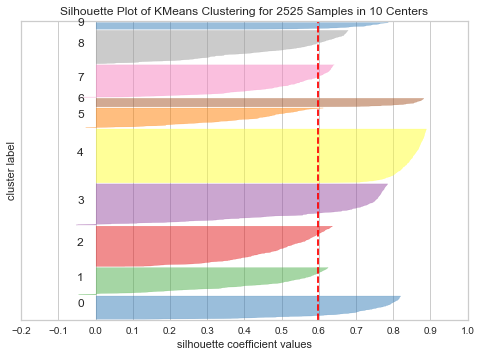

FOR 11 CLUSTERS SUM IS 1523.2912 AND MEAN IS 0.6033


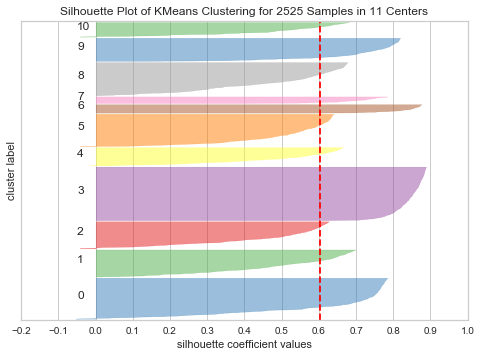

FOR 12 CLUSTERS SUM IS 1523.1500 AND MEAN IS 0.6032


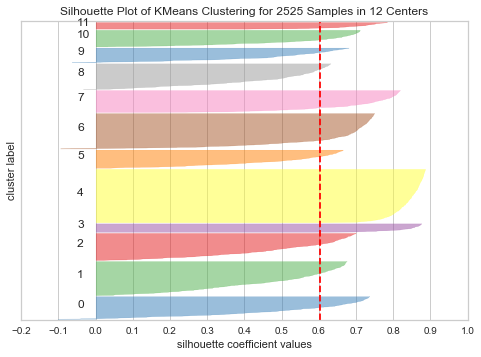

FOR 13 CLUSTERS SUM IS 1559.5710 AND MEAN IS 0.6177


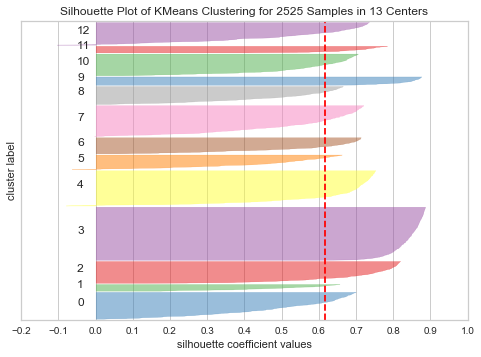

FOR 14 CLUSTERS SUM IS 1556.9842 AND MEAN IS 0.6166


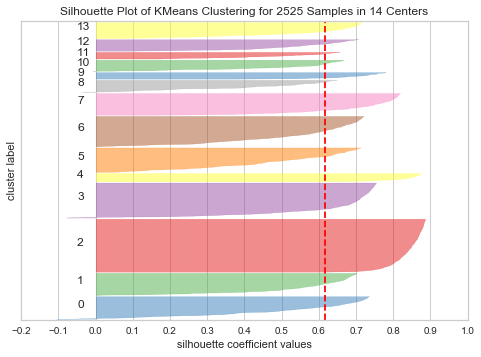

FOR 15 CLUSTERS SUM IS 1532.2953 AND MEAN IS 0.6068


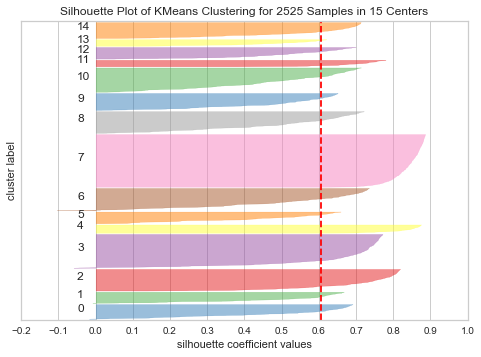

FOR 16 CLUSTERS SUM IS 1516.7437 AND MEAN IS 0.6007


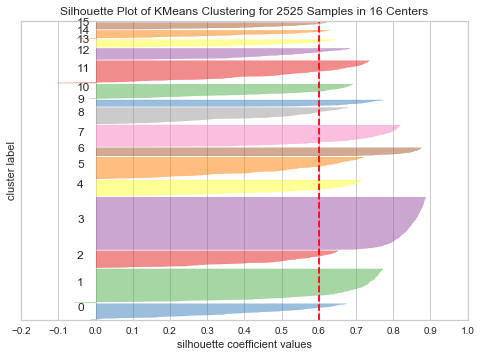

FOR 17 CLUSTERS SUM IS 1515.6833 AND MEAN IS 0.6003


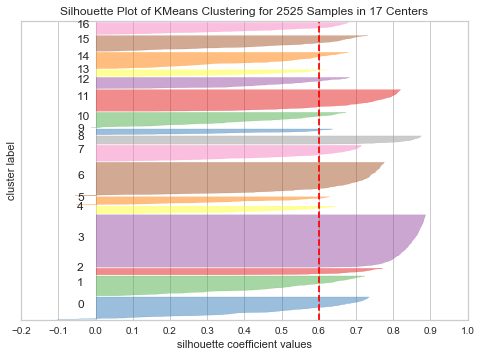

FOR 18 CLUSTERS SUM IS 1475.6886 AND MEAN IS 0.5844


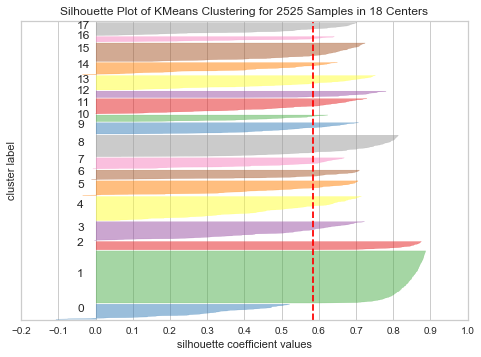

FOR 19 CLUSTERS SUM IS 1460.7638 AND MEAN IS 0.5785


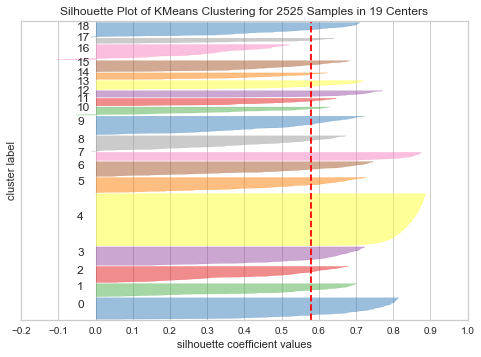

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

ddd = datasets[2][0]
print(datasets[2][1])
print("k-means sillhouete Width")
for k in range(5, 20):
    cluster = KMeans(k)
    visualizer = SilhouetteVisualizer(cluster)
    visualizer.fit(ddd)
    print("FOR %d CLUSTERS SUM IS %.4f AND MEAN IS %.4f" % (
        k, sum(visualizer.silhouette_samples_), 
        visualizer.silhouette_score_)
    )
    visualizer.poof()

In [38]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def single_link(data, clusters=-1):
    clusters = len(set(data.label)) if clusters == -1 else clusters
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def complete_link(data, clusters=-1):
    clusters = len(set(data.label)) if clusters == -1 else clusters
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def average_link(data, clusters=-1):
    clusters = len(set(data.label)) if clusters == -1 else clusters
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def ward_link(data, clusters=-1):
    clusters = len(set(data.label)) if clusters == -1 else clusters
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    return cluster.labels_
    
def em_clust(data):
    return GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])

def plot_with_error(x, y, y_hat, ax):
    ari = adjusted_rand_score(y, y_hat)
    ax.scatter(x[:, 0], x[:, 1], c = y_hat, cmap='rainbow')
    return (1 - ari) / 2, ari

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


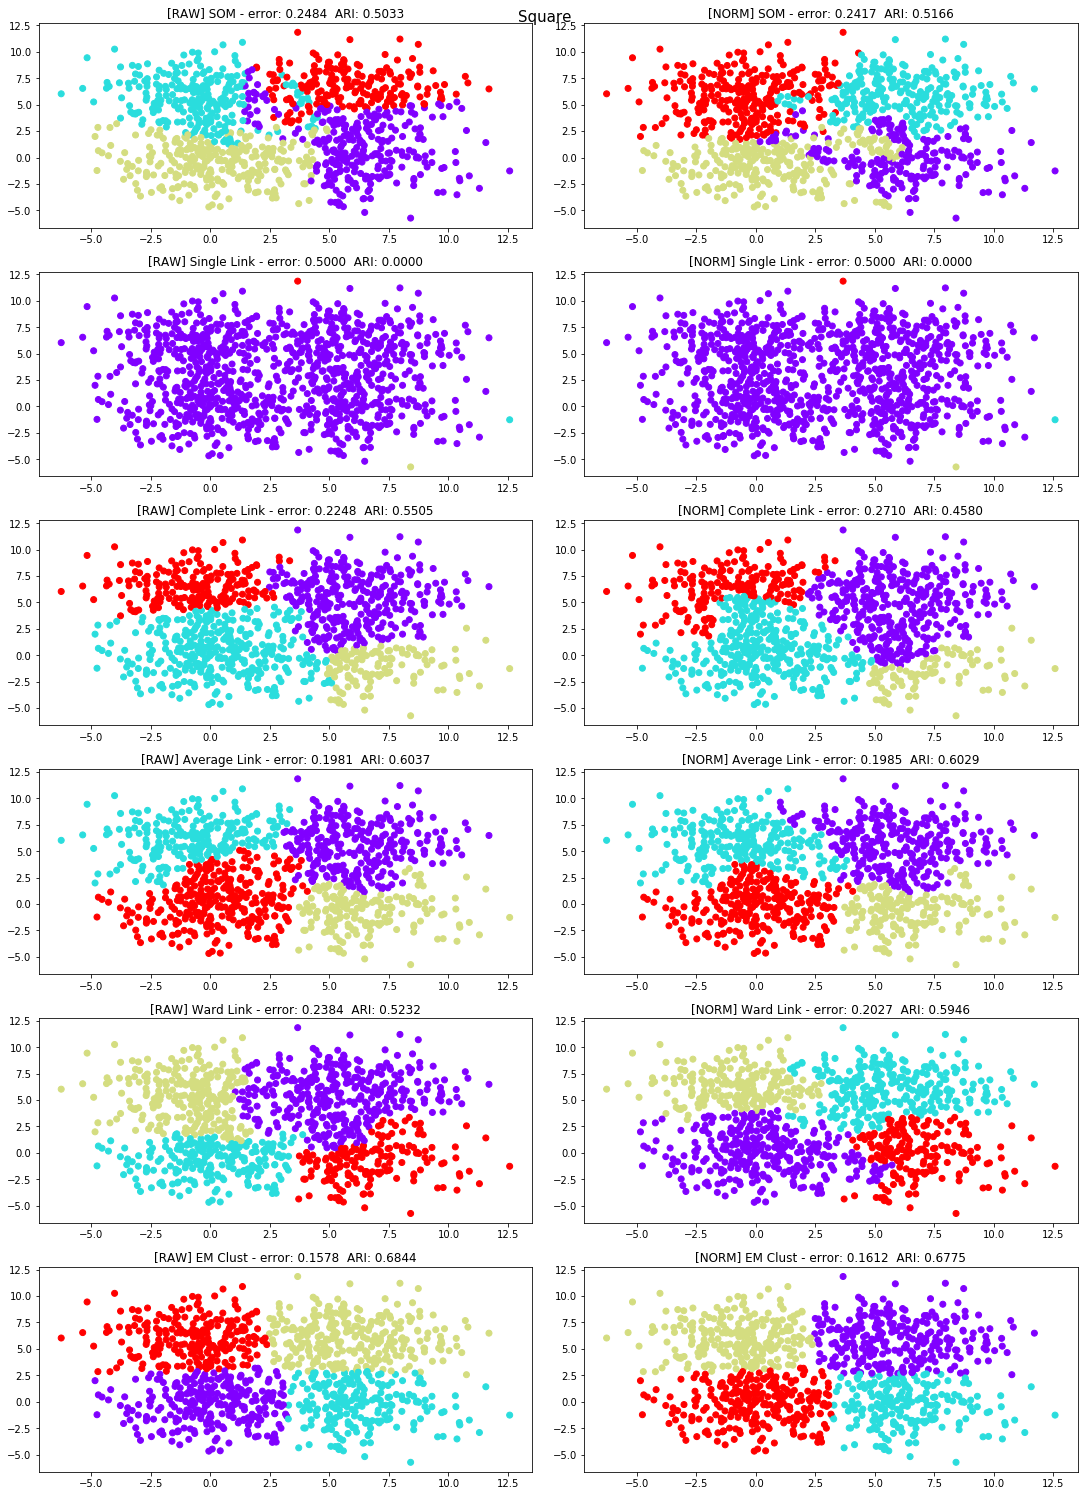

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


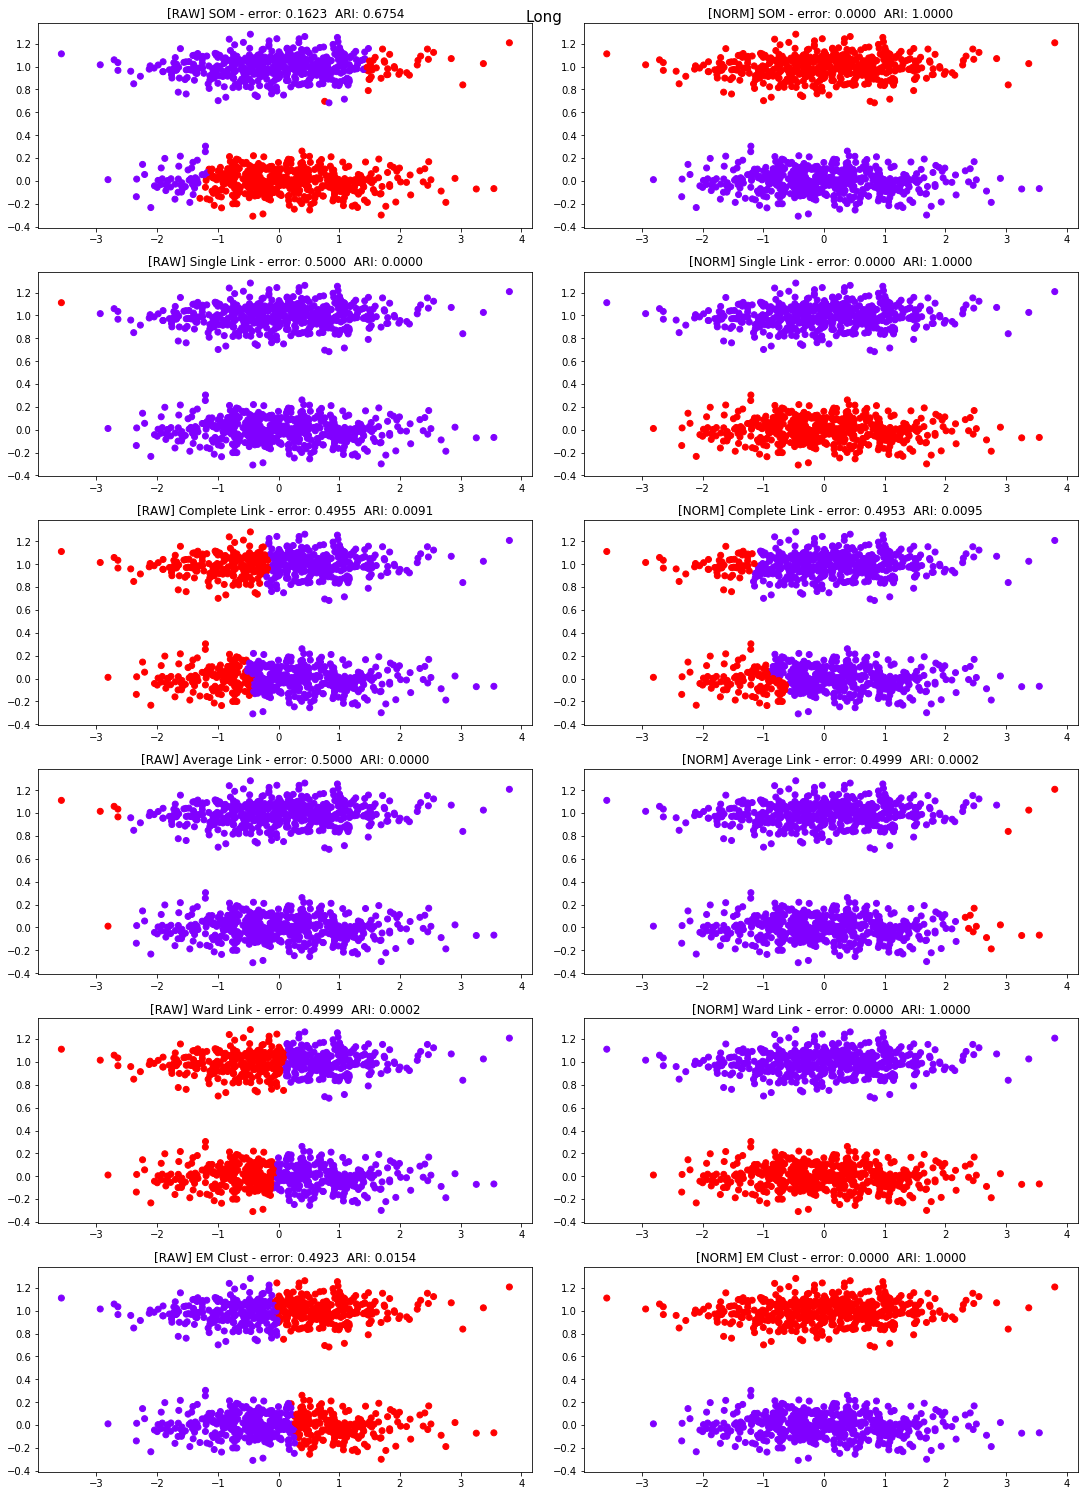

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


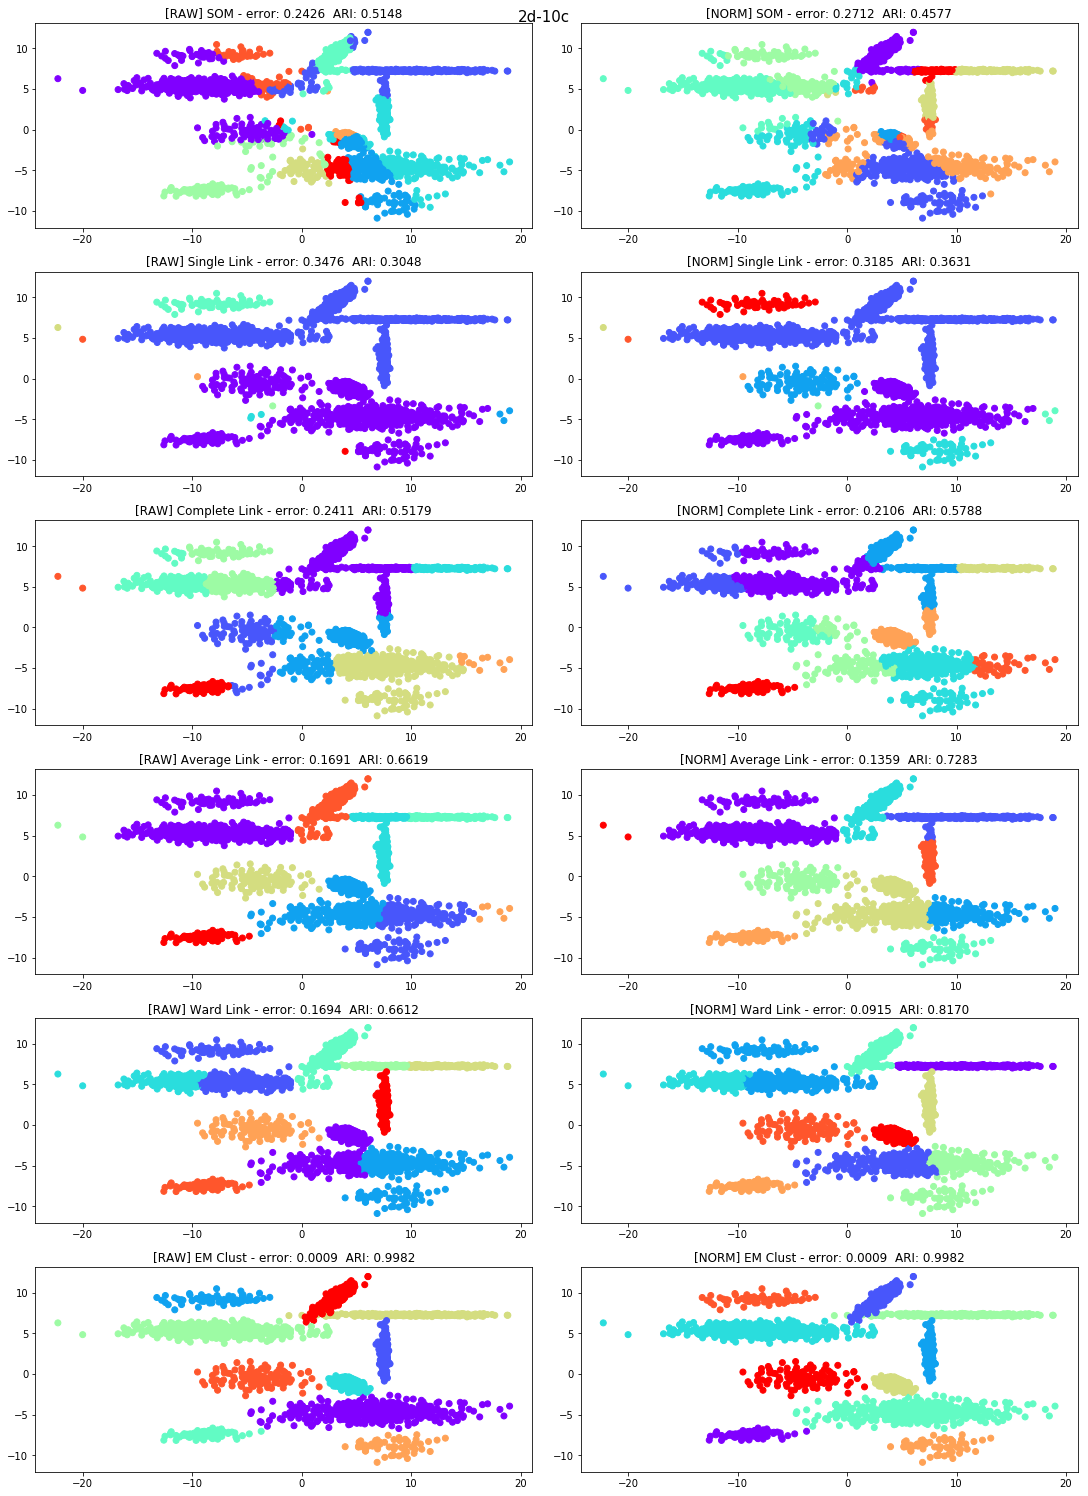

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


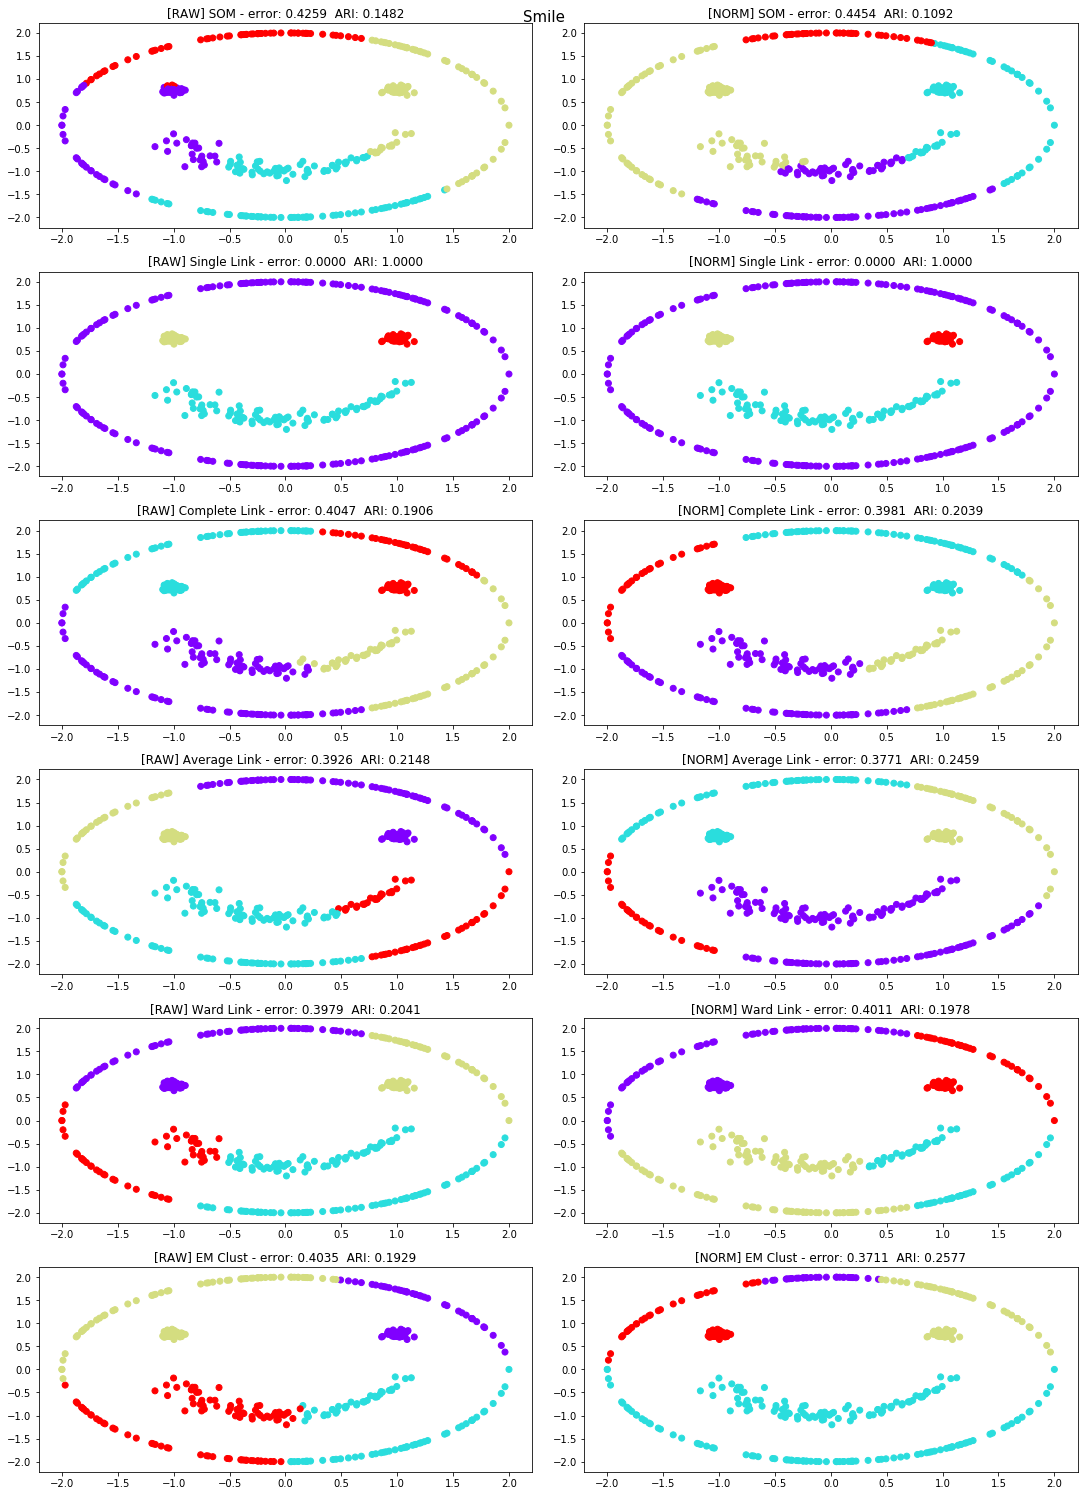

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


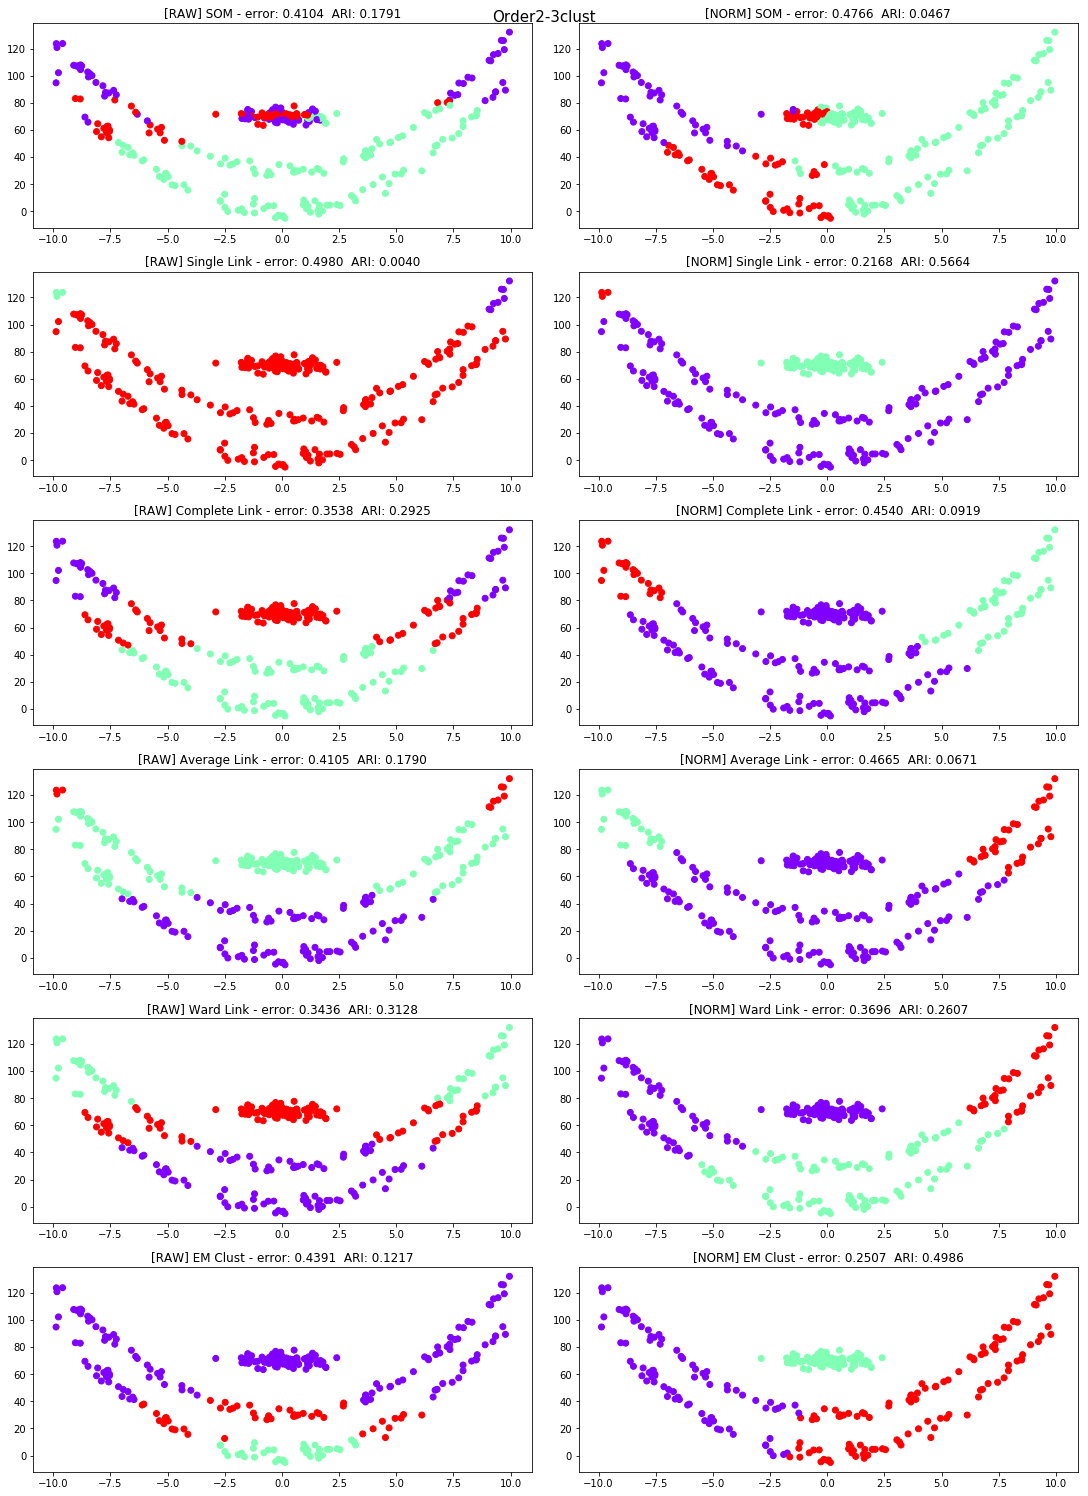

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


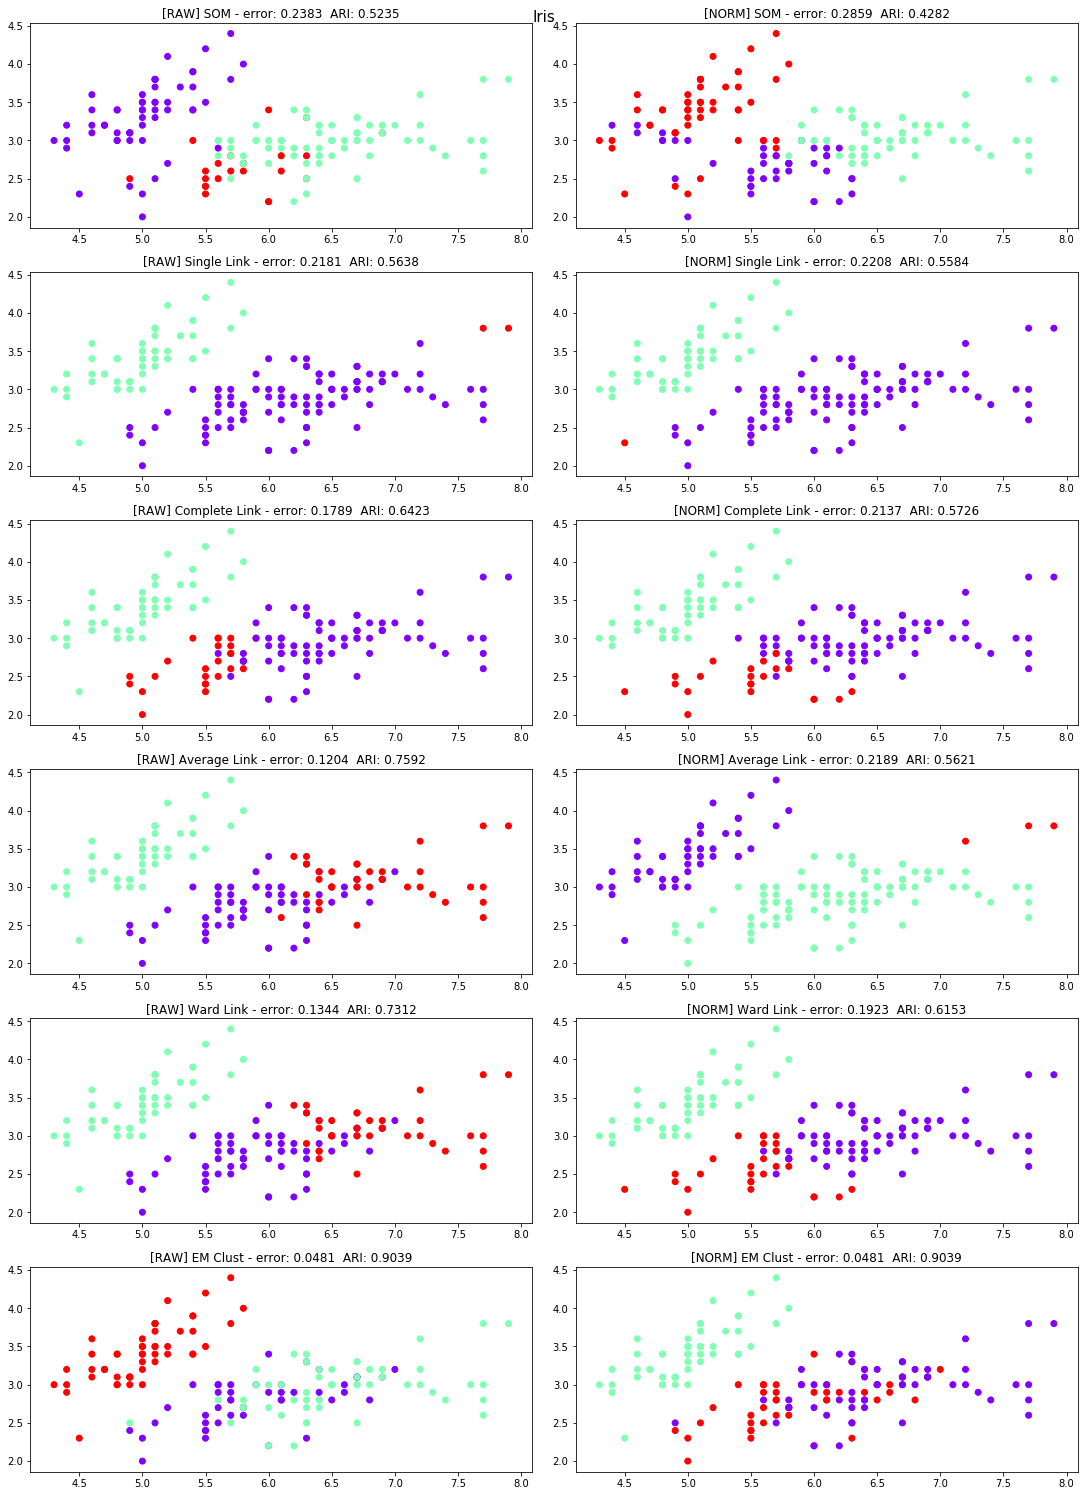

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

algs = [
        (SOM_clustering, "SOM"),
        (single_link, "Single Link"),
        (complete_link, "Complete Link"),
        (average_link, "Average Link"),
        (ward_link, "Ward Link"),
        (em_clust, "EM Clust")
    ]

def display(algs, data, dataset_name):
    fig, axs = plt.subplots(len(algs), 2, constrained_layout=True, figsize=(15, 21))
    fig.suptitle(dataset_name, fontsize=15)
    for idx, (alg, name) in enumerate(algs):
        labels_for_raw = alg(data)
        np_data = data.values
        raw_err = plot_with_error(np_data[:, :2], data.label, labels_for_raw, axs.flatten()[2 * idx])
        axs.flatten()[2 * idx].title.set_text("[RAW] %s - error: %.4f  ARI: %.4f" % (name, *raw_err))
        
        norm_data = np_data.copy()
        norm_data[:, :-1] = (np_data[:, :-1] - np.mean(np_data[:, :-1], axis=0)) / np.std(np_data[:, :-1], axis=0)
        labels_for_norm = alg(pd.DataFrame(norm_data, columns=data.columns))
        norm_err = plot_with_error(np_data[:, :2], data.label, labels_for_norm, axs.flatten()[2 * idx + 1])
        axs.flatten()[2 * idx + 1].title.set_text("[NORM] %s - error: %.4f  ARI: %.4f" % (name, *norm_err))

    plt.show()

for data, name in datasets:
    display(algs, data, name)


In [49]:
data = pd.read_csv(r"../data/train.csv")
del data['Id']

data = data.rename(index=str, columns={'Cover_Type': 'label'})
np_norm_data = data.values
np_norm_data[:, :14] = (np_norm_data[:, :14] - np.mean(np_norm_data[:, :14], axis=0)) / np.std(np_norm_data[:, :14], axis=0)
norm_data = pd.DataFrame(np_norm_data, columns=data.columns)

def print_stats(data, data_type, alg, alg_name):
    y_hat = alg(data)
    ari = adjusted_rand_score(data.label.values, y_hat)
    print("[%s][%s] ERROR: %.4f\tARI: %.4f" % (data_type, alg_name, (1 - ari) / 2, ari))

adjusted_algs = [
    (single_link, "Single Link"),
    (complete_link, "Complete Link"),
    (average_link, "Average Link"),
    (ward_link, "Ward Link"),
    (lambda d: SOM_clustering(d, grid_shape=(8, 8), lr=0.03, epochs=200), "SOM"),
    (em_clust, "EM Clust")
]

for alg, alg_name in adjusted_algs[-2:]:
    print_stats(data, 'RAW', alg, alg_name)
    print_stats(norm_data, 'NORM', alg, alg_name)
    
unique_labels = len(set(data.label))
for total_clusters in range(unique_labels, 3 * unique_labels, 2):
    print("USING %d clusters" % (total_clusters, ))
    for alg, alg_name in adjusted_algs[:-2]:
        print_stats(data, 'RAW', lambda d: alg(d, total_clusters), alg_name)
        print_stats(norm_data, 'NORM', lambda d: alg(d, total_clusters), alg_name)
    print()



Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
[RAW][SOM] ERROR: 0.4900	ARI: 0.0200
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
[NORM][SOM] ERROR: 0.4799	ARI: 0.0403
[RAW][EM Clust] ERROR: 0.4030	ARI: 0.1940
[NORM][EM Clust] ERROR: 0.3842	ARI: 0.2316
USING 7 clusters
[RAW][Single Link] ERROR: 0.4993	ARI: 0.0014
[NORM][Single Link] ERROR: 0.4993	ARI: 0.0014
[RAW][Complete Link] ERROR: 0.4899	ARI: 0.0202
[NORM][Complete Link] ERROR: 0.4899	ARI: 0.0202
[RAW][Average Link] ERROR: 0.4990	ARI: 0.0020
[NORM][Average Link] ERROR: 0.4990	ARI: 0.0020
[RAW][Ward Link] ERROR: 0.4316	ARI: 0.1369
[NORM][Ward Link] ERROR: 0.4316	ARI: 0.1369

USING 9 clusters
[RAW][Single Link] ERROR: 0.4993	ARI: 0.0014
[NORM][Single Link] ERROR: 0.4993	ARI: 0.0014
[RAW][Complete Link] ERROR: 0.4892	ARI: 0.0215
[NORM][Complete Link] ERROR: 0.4892	ARI: 0.0215
[RAW][Average Link] ERROR: 0.4990	ARI: 0.0020
[

In [57]:
cdata = data.copy()
cdata.drop(list(data.columns)[14:-1], axis=1, inplace=True)

np_norm_cdata = cdata.values
np_norm_cdata[:, :14] = (np_norm_cdata[:, :14] - np.mean(np_norm_cdata[:, :14], axis=0)) / np.std(np_norm_cdata[:, :14], axis=0)
norm_cdata = pd.DataFrame(np_norm_data, columns=data.columns)

for alg, alg_name in adjusted_algs[-2:]:
    print_stats(cdata, 'RAW', alg, alg_name)
    print_stats(norm_cdata, 'NORM', alg, alg_name)
    
for total_clusters in range(unique_labels, 3 * unique_labels, 2):
    print("USING %d clusters" % (total_clusters, ))
    for alg, alg_name in adjusted_algs[:-2]:
        print_stats(cdata, 'RAW', lambda d: alg(d, total_clusters), alg_name)
        print_stats(norm_cdata, 'NORM', lambda d: alg(d, total_clusters), alg_name)
    print()


Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
[RAW][SOM] ERROR: 0.4956	ARI: 0.0088
Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!
[NORM][SOM] ERROR: 0.4868	ARI: 0.0264
[RAW][EM Clust] ERROR: 0.4374	ARI: 0.1253
[NORM][EM Clust] ERROR: 0.4001	ARI: 0.1997
USING 7 clusters
[RAW][Single Link] ERROR: 0.4993	ARI: 0.0014
[NORM][Single Link] ERROR: 0.4993	ARI: 0.0014
[RAW][Complete Link] ERROR: 0.4986	ARI: 0.0028
[NORM][Complete Link] ERROR: 0.4899	ARI: 0.0202
[RAW][Average Link] ERROR: 0.4987	ARI: 0.0026
[NORM][Average Link] ERROR: 0.4990	ARI: 0.0020
[RAW][Ward Link] ERROR: 0.4227	ARI: 0.1546
[NORM][Ward Link] ERROR: 0.4316	ARI: 0.1369

USING 9 clusters
[RAW][Single Link] ERROR: 0.4993	ARI: 0.0014
[NORM][Single Link] ERROR: 0.4993	ARI: 0.0014
[RAW][Complete Link] ERROR: 0.4981	ARI: 0.0038
[NORM][Complete Link] ERROR: 0.4892	ARI: 0.0215
[RAW][Average Link] ERROR: 0.4984	ARI: 0.0032
[